In [17]:
!pip install pandas

In [18]:
!pip install numpy

In [19]:
!pip install matplotlib

In [20]:
!pip install seaborn

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
data = {
    'StudentID': [1, 2, 3, 4, 5, 6],
    'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Eve', 'Frank'],
    'Gender': ['F', 'M', 'M', 'M', 'F', 'M'],
    'Math_Score': [88, np.nan, 95, 40, 70, 85],
    'English_Score': [92, 78, -5, 85, 88, 90],
    'Science_Score': [85, 75, 80, 78, np.nan, 82],
    'Attendance_Percentage': [95, 87, 120, 80, 92, np.nan]
}

In [46]:
d = pd.DataFrame(data)
d

,StudentID,Name,Gender,Math_Score,English_Score,Science_Score,Attendance_Percentage
0,1,Alice,F,88.0,92,85.0,95.0
1,2,Bob,M,NaN,78,75.0,87.0
2,3,Charlie,M,95.0,-5,80.0,120.0
3,4,David,M,40.0,85,78.0,80.0
4,5,Eve,F,70.0,88,NaN,92.0
5,6,Frank,M,85.0,90,82.0,NaN


In [47]:
print("Missing Values:")
d.isnull()

Missing Values:


,StudentID,Name,Gender,Math_Score,English_Score,Science_Score,Attendance_Percentage
0,False,False,False,False,False,False,False
1,False,False,False,True,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,True,False
5,False,False,False,False,False,False,True


In [48]:
print("Count of missing values in each column:")
d.isnull().sum()

Count of missing values in each column:


StudentID                0
Name                     0
Gender                   0
Math_Score               1
English_Score            0
Science_Score            1
Attendance_Percentage    1
dtype: int64

In [49]:
d['Math_Score'] = d['Math_Score'].fillna(d['Math_Score'].mean())
d['Science_Score'] = d['Science_Score'].fillna(d['Science_Score'].mean())
d['Attendance_Percentage'] = d['Attendance_Percentage'].fillna(d['Attendance_Percentage'].mean())
d.loc[d['English_Score'] < 0, 'English_Score'] = 0
d.loc[d['Attendance_Percentage'] > 100, 'Attendance_Percentage'] = 100
d

,StudentID,Name,Gender,Math_Score,English_Score,Science_Score,Attendance_Percentage
0,1,Alice,F,88.0,92,85.0,95.0
1,2,Bob,M,75.6,78,75.0,87.0
2,3,Charlie,M,95.0,0,80.0,100.0
3,4,David,M,40.0,85,78.0,80.0
4,5,Eve,F,70.0,88,80.0,92.0
5,6,Frank,M,85.0,90,82.0,94.8


In [50]:
for col in ['Math_Score', 'English_Score', 'Science_Score', 'Attendance_Percentage']:
    Q1 = d[col].quantile(0.25)
    Q3 = d[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    outliers = d[(d[col] < lower_limit) | (d[col] > upper_limit)]
    print(f"Outliers in {col}:", outliers[[col]], "\n")
    d[col] = np.where(d[col] < lower_limit, lower_limit, d[col])        # Update the Outliers
    d[col] = np.where(d[col] > upper_limit, upper_limit, d[col])

Outliers in Math_Score:    Math_Score
3        40.0 

Outliers in English_Score:    English_Score
2              0 

Outliers in Science_Score: Empty DataFrame
Columns: [Science_Score]
Index: [] 

Outliers in Attendance_Percentage: Empty DataFrame
Columns: [Attendance_Percentage]
Index: [] 



In [51]:
d

,StudentID,Name,Gender,Math_Score,English_Score,Science_Score,Attendance_Percentage
0,1,Alice,F,88.000,92.000,85.0,95.0
1,2,Bob,M,75.600,78.000,75.0,87.0
2,3,Charlie,M,95.000,65.125,80.0,100.0
3,4,David,M,47.625,85.000,78.0,80.0
4,5,Eve,F,70.000,88.000,80.0,92.0
5,6,Frank,M,85.000,90.000,82.0,94.8


In [53]:
#Change the scale for better understanding
d['Attendance_Scaled'] = d['Attendance_Percentage'] / 100                       #Change scale (0-100 → 0-1)
d[['Attendance_Percentage', 'Attendance_Scaled']]

,Attendance_Percentage,Attendance_Scaled
0,95.0,0.950
1,87.0,0.870
2,100.0,1.000
3,80.0,0.800
4,92.0,0.920
5,94.8,0.948


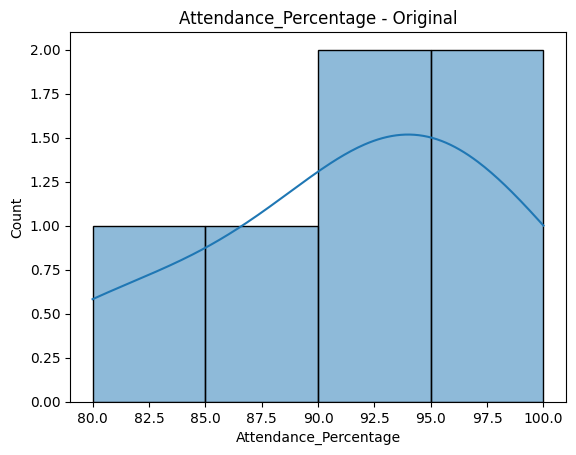

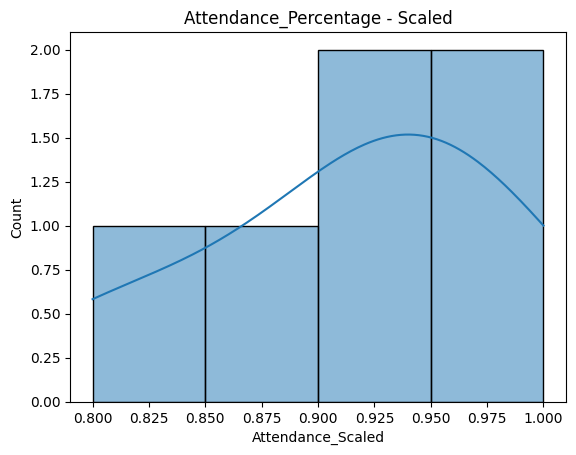

In [54]:
sns.histplot(d['Attendance_Percentage'], kde=True)
plt.title("Attendance_Percentage - Original")
plt.show()

sns.histplot(d['Attendance_Scaled'], kde=True)
plt.title("Attendance_Percentage - Scaled")
plt.show()

In [55]:
#Convert a non-linear relationship into a linear one
d['Math_Score_Sqrt'] = np.sqrt(d['Math_Score'])                                 #Non-linear → linear (square root)
d[['Math_Score', 'Math_Score_Sqrt']]

,Math_Score,Math_Score_Sqrt
0,88.000,9.380832
1,75.600,8.694826
2,95.000,9.746794
3,47.625,6.901087
4,70.000,8.366600
5,85.000,9.219544


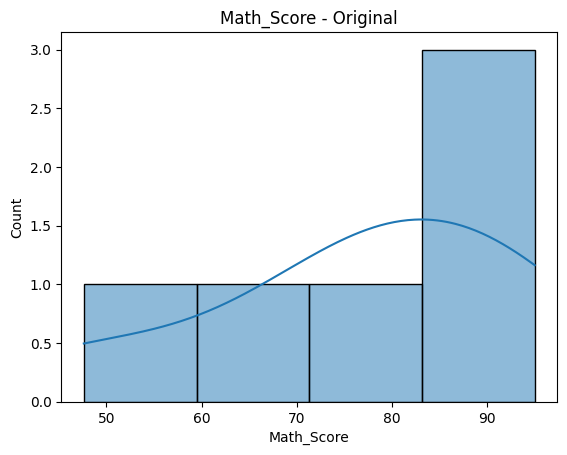

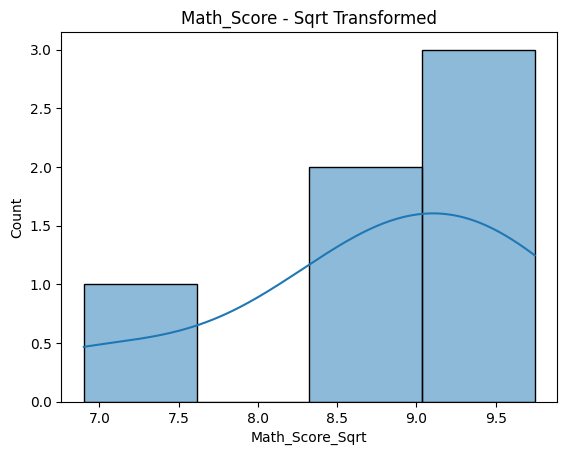

In [56]:
sns.histplot(d['Math_Score'], kde=True)
plt.title("Math_Score - Original")
plt.show()

sns.histplot(d['Math_Score_Sqrt'], kde=True)
plt.title("Math_Score - Sqrt Transformed")
plt.show()

In [57]:
#Decrease skewness and make it normal
d['Science_Score_Log'] = np.log1p(d['Science_Score'])                           #Reduce skewness (log)
d[['Science_Score', 'Science_Score_Log']]

,Science_Score,Science_Score_Log
0,85.0,4.454347
1,75.0,4.330733
2,80.0,4.394449
3,78.0,4.369448
4,80.0,4.394449
5,82.0,4.418841


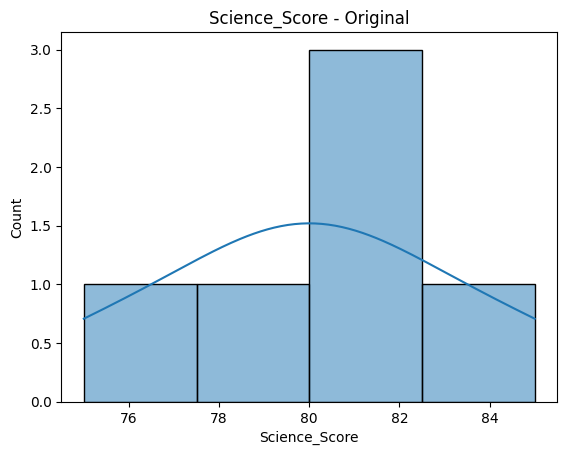

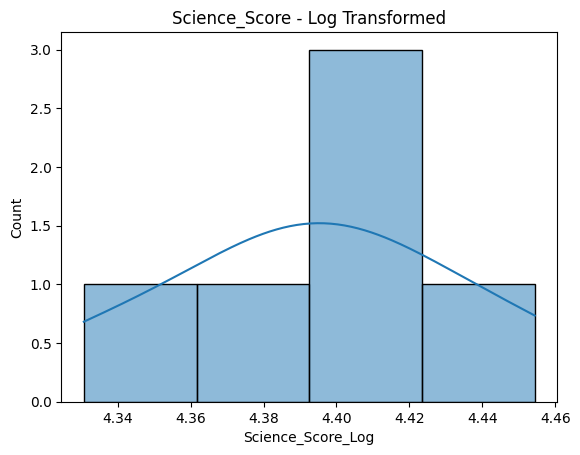

In [58]:
sns.histplot(d['Science_Score'], kde=True)
plt.title("Science_Score - Original")
plt.show()

sns.histplot(d['Science_Score_Log'], kde=True)
plt.title("Science_Score - Log Transformed")
plt.show()